In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from common_import import *

### Evaluate single experiment

In [5]:
checkpoint = 'MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_same_z_input_centering_steprot_1+original_tr_s1_ts_s5678'
args, opts = get_opt_args_from_model_name(checkpoint, mode='latest')
model_pos, chk_filename, checkpoint = load_model(opts, args)

subset = 'H36M-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z-TR_S1_TS_S5678'
args.subset_list = [subset]
train_loader, test_loader, _, _, datareader = load_dataset(args, use_new_datareader=True)

# if '3DHP' in subset:
#     args.eval_part = 'whole_without_nose'
#     args.part_list = ['whole_without_nose']

configs/pose3d/MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_same_z_input_centering_steprot_1+original_tr_s1_ts_s5678.yaml
True
MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_same_z_input_centering_steprot_1+original_tr_s1_ts_s5678
Loading checkpoint checkpoint/pose3d/MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_same_z_input_centering_steprot_1+original_tr_s1_ts_s5678/latest_epoch.bin
Loading dataset...
H36M-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z-TR_S1_TS_S5678
[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d_canonical_same_z...
[overwrite: False] ==> Loading H36M cam_3d_canonical_same_z...


In [6]:
e1, e2, results_all, inputs_all, gts_all, total_result_dict = evaluate(args, model_pos, test_loader, datareader, checkpoint, only_one_batch=False)

INFO: Testing
No epoch information in the checkpoint


  0%|          | 0/323 [00:00<?, ?it/s]

100%|██████████| 323/323 [01:47<00:00,  3.00it/s]


No eval_keypoint. Use part list
Part: whole
Protocol #1 Error (MPJPE): 33.17149596589532 mm
Protocol #2 Error (P-MPJPE): 20.600891182041828 mm
----------------------------------------


### Evaluate and save all experiments

In [2]:
result_list = os.listdir('saved_results')
checkpoint_list = os.listdir('checkpoint/pose3d')
whitelist_checkpoint = []
for item in os.listdir('configs/pose3d'):
    checkpoint = item.split('.yaml')[0]
    if 'cam_no_factor' not in checkpoint: continue
    if checkpoint in blacklist_checkpoint: continue
    if checkpoint not in checkpoint_list: 
        print(f'[Need to be trained] {checkpoint}')
        continue
    if checkpoint not in experiment_list:
        whitelist_checkpoint.append(checkpoint)
        # create empty file
        with open(f'experiments/{checkpoint}.txt', 'w') as f:
            pass
    else:
        subset_list = []
        with open(f'experiments/{checkpoint}.txt', 'r') as f:
            lines = f.readlines()
            for line in lines:
                subset = line.split('\n')[0]
                subset_list.append(subset)
        if len(subset_list) == 0:
            print(f'[No subset found] {checkpoint}')
            whitelist_checkpoint.append(checkpoint)
        for subset in subset_list:
            if not os.path.exists(f'saved_results/{checkpoint}/{subset}.pkl'):
                print(f'[Result not found] {checkpoint} - {subset}')
                if checkpoint not in whitelist_checkpoint: 
                    whitelist_checkpoint.append(checkpoint)
                    
print('\nCheckpoints to evaluate:')
whitelist_checkpoint

[Result not found] MB_train_h36m_gt_cam_no_factor - 3DHP-GT-CAM_NO_FACTOR-TEST_TS1_6
[Result not found] MB_train_h36m_gt_cam_no_factor - FIT3D-GT-CAM_NO_FACTOR-ALL_TEST
[Result not found] MB_train_h36m_gt_cam_no_factor - 3DHP-GT-CAM_NO_FACTOR-TEST_ALL_TRAIN
[Result not found] MB_train_h36m_gt_cam_no_factor - H36M-GT-CAM_NO_FACTOR
[Result not found] MB_train_h36m_gt_cam_no_factor - 3DHP-GT-CAM_NO_FACTOR-TEST_TS1_6_UNIV
[Result not found] MB_train_h36m_gt_cam_no_factor - 3DHP-GT-CAM_NO_FACTOR-TEST_ALL_TRAIN_UNIV
[Need to be trained] MB_train_h36m_gt_cam_no_factor_no_rootrel
[Need to be trained] MB_train_fit3d_gt_cam_no_factor_tr_s03
[Need to be trained] MB_train_h36m_gt_cam_no_factor_steprot_1+original_tr_s1_ts_s5678
[Need to be trained] MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_fixed_dist_5_input_centering_tr_s1_ts_s5678_frame_81
[Need to be trained] MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_same_z_input_centering_rand_yaw_m45_p100_rand_pitch_m45_p100_rand_roll

['MB_train_h36m_gt_cam_no_factor',
 'MB_train_h36m_gt_cam_no_factor_no_flip',
 'MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_revolute_input_centering']

In [2]:
whitelist_checkpoint = ['MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_revolute_input_centering']

In [3]:
experiment_root = f'/home/{user}/codes/MotionBERT/experiments'
for item in glob(experiment_root+'/*.txt'):
    checkpoint = os.path.basename(item).split('.txt')[0]
    if checkpoint in blacklist_checkpoint: continue
    if len(whitelist_checkpoint) > 0 and checkpoint not in whitelist_checkpoint: continue
    if 'cam_no_factor' not in checkpoint: continue
    save_folder = f'/home/hrai/codes/MotionBERT/saved_results/{checkpoint}'
    if not os.path.exists(save_folder): os.makedirs(save_folder)

    # load model
    args, opts = get_opt_args_from_model_name(checkpoint, verbose=False)
    model_pos, chk_filename, checkpoint = load_model(opts, args)

    subset_list = []
    with open(item, 'r') as f:
        lines = f.readlines()
        for line in lines:
            subset = line.strip()
            subset_list.append(subset)

    for subset in subset_list:
        if 'PCL' in subset: args.fix_orientation_pred = True
        save_path = os.path.join(save_folder, f'{subset}.pkl')
        if os.path.exists(save_path):
            print(f'{save_path} exists')
            continue
        try:
            # load dataset
            args.subset_list = [subset]
            train_loader, test_loader, _, _, datareader = load_dataset(args, use_new_datareader=True)
            # evaluation
            e1, e2, results_all, inputs_all, gts_all, total_result_dict = evaluate(args, model_pos, test_loader, datareader, checkpoint, only_one_batch=False)
            # save results
            results_dict = {'results_all': results_all, 'gts_all': gts_all, 'inputs_all': inputs_all, 'total_result_dict': total_result_dict, 'e1': e1, 'e2': e2}
            savepkl(results_dict, save_path)
        except Exception as e:
            print(f'Error: {e}')


MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_revolute_input_centering
Loading checkpoint checkpoint/pose3d/MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_revolute_input_centering/best_epoch.bin
/home/hrai/codes/MotionBERT/saved_results/MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_revolute_input_centering/H36M-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_REVOLUTE.pkl exists
/home/hrai/codes/MotionBERT/saved_results/MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_revolute_input_centering/H36M-GT-CAM_NO_FACTOR-INPUT_FROM_CANONICAL_PCL.pkl exists
Loading dataset...
3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_REVOLUTE-TEST_TS1_6
[overwrite: False] ==> Loading 3DHP source_list...
[overwrite: False] ==> Loading 3DHP cam_param...
[overwrite: False] ==> Loading 3DHP cam_3d...
[overwrite: False] ==> Loading 3DHP cam_3d_canonical_revolute...
[overwrite: False] ==> Loading 3DHP img_2d_canonical_revolute...


/home/hrai/codes/MotionBERT/lib/data/datareader_total.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_data, test_data = train_data[split_id_train], test_data[split_id_test]                # (N, 27, 17, 3)
/home/hrai/codes/MotionBERT/lib/data/datareader_total.py:376: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_labels, test_labels = train_labels[split_id_train], test_labels[split_id_test]        # (N, 27, 17, 3)


INFO: Testing
No epoch information in the checkpoint


100%|██████████| 6/6 [00:04<00:00,  1.21it/s]
/home/hrai/Anaconda3/envs/motionbert/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/hrai/Anaconda3/envs/motionbert/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No eval_keypoint. Use part list
Part: whole
Protocol #1 Error (MPJPE): nan mm
Protocol #2 Error (P-MPJPE): nan mm
----------------------------------------
Loading dataset...
3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_CANONICAL_PCL-TEST_TS1_6
[overwrite: False] ==> Loading 3DHP source_list...
[overwrite: False] ==> Loading 3DHP cam_param...
[overwrite: False] ==> Loading 3DHP cam_3d...
[overwrite: False] ==> Loading 3DHP cam_3d_canonical_pcl...
[overwrite: False] ==> Loading 3DHP img_2d_canonical_pcl...
INFO: Testing
No epoch information in the checkpoint


100%|██████████| 6/6 [00:02<00:00,  2.43it/s]

No eval_keypoint. Use part list
Part: whole
Protocol #1 Error (MPJPE): 79.59198601298407 mm
Protocol #2 Error (P-MPJPE): 53.87774673714513 mm
----------------------------------------


In [4]:
with torch.no_grad():
    for batch_input, batch_gt in tqdm(test_loader): # batch_input: normalized joint_2d, batch_gt: normalized joint3d_image
        batch_size = len(batch_input)
        # preprocessing
        batch_gt_original = batch_gt.clone().detach().cuda()
        batch_input, batch_gt, batch_gt_torso, batch_gt_limb_pos = preprocess_eval(args, batch_input, batch_gt)
        # inference
        predicted_3d_pos = batch_inference_eval(args, model_pos, batch_input, batch_gt, batch_gt_torso, batch_gt_limb_pos)
        break

  0%|          | 0/6 [00:00<?, ?it/s]


In [17]:
np.linalg.norm(pose3d_gt - pose3d_pred)

8.880812

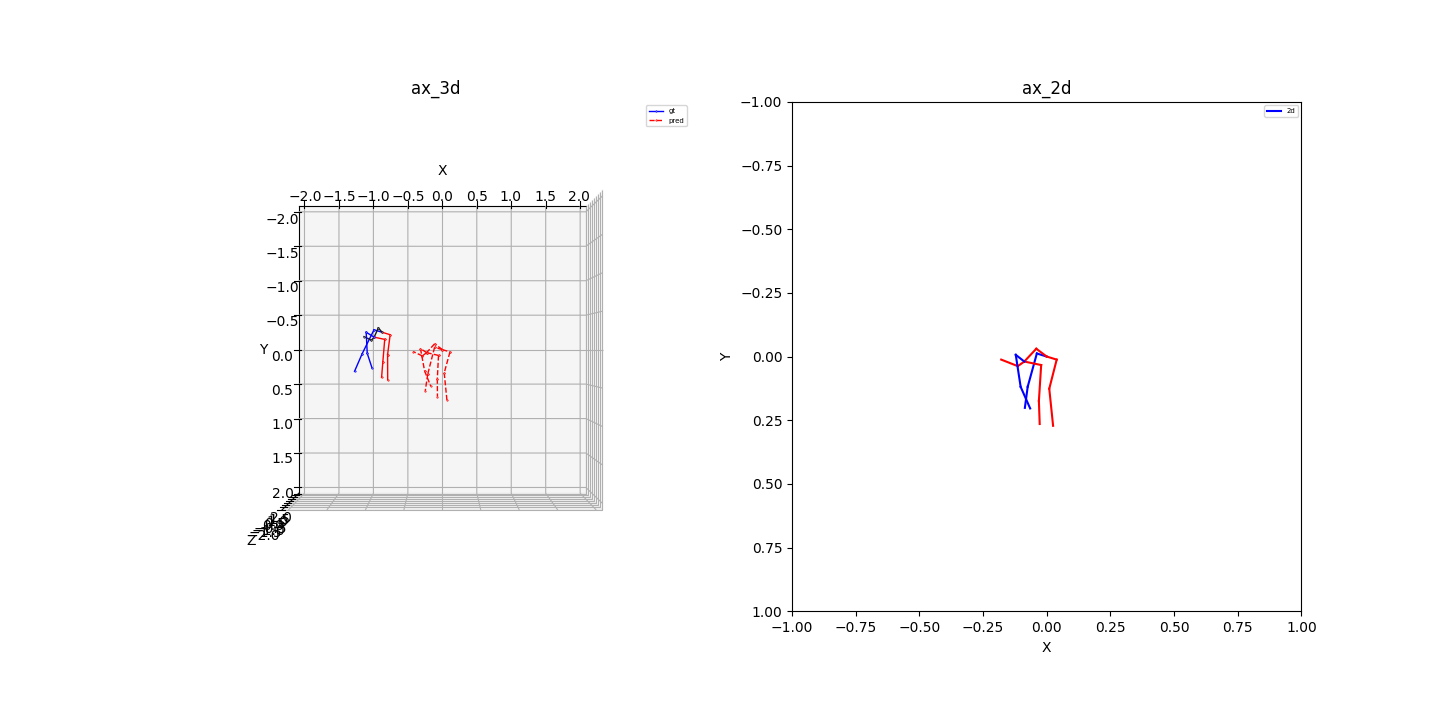

In [18]:
batch_num, frame_num = 10, 10
pose2d_norm = batch_input[batch_num].cpu().numpy()
#pose2d = denormalize_input(pose2d_norm, 1000, 1000)
pose3d_original_gt = batch_gt_original[batch_num].cpu().numpy()
# pose3d_original_hat = pose3d_original.copy() - pose3d_original[0:1]
pose3d_gt = batch_gt[batch_num].cpu().numpy()
pose3d_pred = predicted_3d_pos[batch_num].cpu().numpy()

configs = {
    'ax_3d': {'type': '3d', 'loc': 121, 'mode': 'cam'},
    'ax_2d': {'type': '2d', 'loc': 122, 'normalize': True},
}
fig, axs = generate_axes(2, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', pose3d_original_gt,           {'color': '', 'label': 'gt'}),
    ('ax_3d', pose3d_pred,         {'color': 'r', 'label': 'pred', 'linestyle': '--'}),
    ('ax_2d', pose2d_norm,         {'color': '', 'label': '2d'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
plt.show()

### Cherrypick e1, e1 -> result_dict.pkl

In [5]:
blacklist_checkpoint = ['MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_same_z_s15678_tr_54138969_ts_others']

if os.path.exists('result_dict.pkl'):
    print('Loading result_dict.pkl')
    result_dict = readpkl('result_dict.pkl')
else:
    result_dict = {}
result_root = '/home/hrai/codes/MotionBERT/saved_results'
checkpoint_list = os.listdir(result_root)
for checkpoint in tqdm(checkpoint_list):
    if checkpoint in blacklist_checkpoint: continue # skip
    if checkpoint not in result_dict.keys(): result_dict[checkpoint] = {} # create new key if not exists
    checkpoint_root = os.path.join(result_root, checkpoint)
    subset_list = glob(checkpoint_root+'/*.pkl')
    for item in subset_list:
        subset = os.path.basename(item).split('.pkl')[0]
        if subset in result_dict[checkpoint].keys(): 
            #print(f'{subset} exists')
            continue
        result = readpkl(item)
        result_dict[checkpoint][subset] = {'e1': result['e1'], 'e2': result['e2']}
savepkl(result_dict, 'result_dict.pkl')

Loading result_dict.pkl


  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████| 76/76 [00:01<00:00, 69.95it/s]


In [5]:
import prettytable

# PrettyTable 객체 생성 및 필드 설정
pt = prettytable.PrettyTable()
pt.field_names = ['Checkpoint', 'Subset', 'E1', 'E2']

# 데이터를 리스트에 수집
data = []
for key in result_dict.keys():
    for subset in result_dict[key].keys():
        if 'UNIV' not in subset: 
            continue
        e1 = float(result_dict[key][subset]['e1'])
        e2 = float(result_dict[key][subset]['e2'])
        data.append([key, subset, e1, e2])

# 데이터를 Subset 1순위, E1 2순위로 정렬
data_sorted = sorted(data, key=lambda x: (x[1], x[2]))

# 정렬된 데이터를 테이블에 추가
for row in data_sorted:
    pt.add_row([row[0], row[1], f'{row[2]:.2f}', f'{row[3]:.2f}'])

# 테이블 출력
print(pt)


+-------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------+--------+-------+
|                                                                       Checkpoint                                                                      |                                  Subset                                  |   E1   |   E2  |
+-------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------+--------+-------+
|             MB_train_h36m_gt_cam_no_factor_input_from_canonical_3d_same_z_input_centering_steprot_1_sinu_pitch_m15_p273_sinu_roll_m15_p273            | 3DHP-GT-CAM_NO_FACTOR-INPUT_FROM_3D_CANONICAL_SAME_Z-TEST_ALL_TRAIN_UNIV | 64.83  | 54.33 |
|               